# PRACA DOMOWA NR 1

In [9]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Wgranie ramki danych

In [14]:
df = pd.read_csv("heart_disease_scikit_label_dataset.csv")

# Wstępny przegląd danych

In [113]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1.0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
num         303 non-null float64
dtypes: float64(14)
memory usage: 33.3 KB


W danych nie mamy braków danych, wszystkie są numeryczne więc można użyć metody describe


In [164]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


W tej pracy domowej nie będę analizować wszystkich zmiennych, poszukam ciekawych zależności między niektórymi z nich, oraz ich rozkładów.

# Rozkłady zmiennych

Najpierw przyjrzymy się niektórym zmiennym. Co wiemy o osobach których dane mamy w naszej ramce?


## Wiek

Text(0.5, 1.0, 'Rozkład wieku')

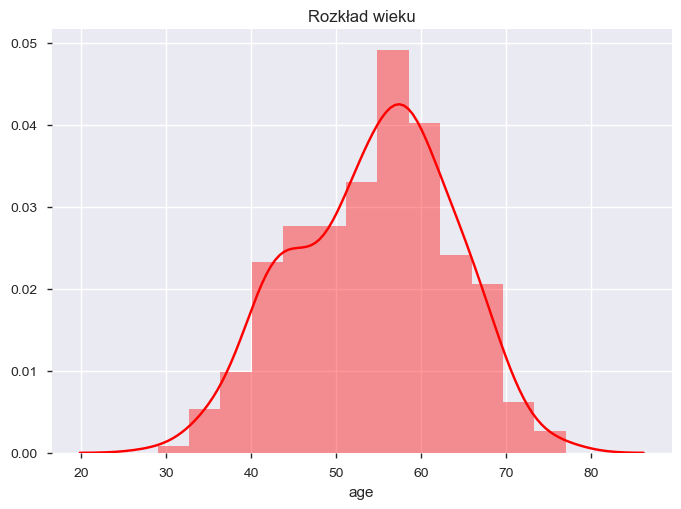

In [150]:
age_dens = sns.distplot(df.age, hist = True, color='red')
age_dens.set_title('Rozkład wieku') 


Rozkład wieku przypomina rozkład normalny, lekko przesunięty w prawą stronę (Pacjentów starszych mamy więcej niż tych młodszych). Badani pacjenci mają między 20 a 80 lat. 

## Płeć 

Procent badanych osobó u których wykryto chorobę serca
54.12541254125413


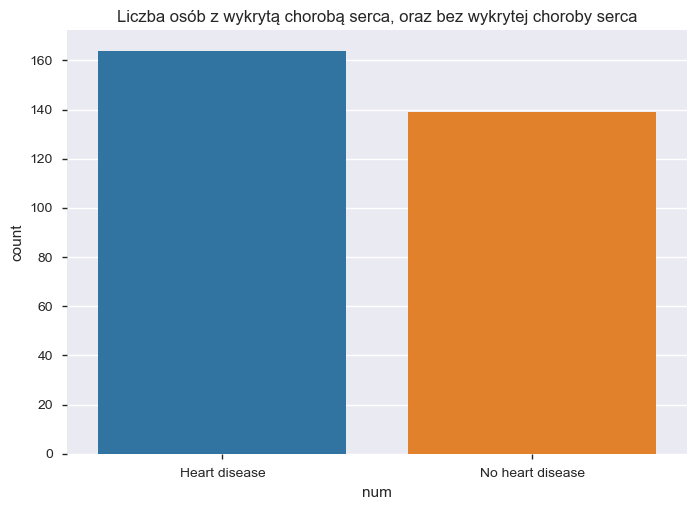

In [153]:
plot=sns.countplot(df.num, dodge=False)
plot.set_title("Liczba osób z wykrytą chorobą serca, oraz bez wykrytej choroby serca")
plot.set(xticklabels=["Heart disease", "No heart disease"])

print("Procent badanych osobó u których wykryto chorobę serca")
print(len(df[df.num==0])/len(df)*100)

[[Text(0, 0, 'women'), Text(0, 0, 'men')]]

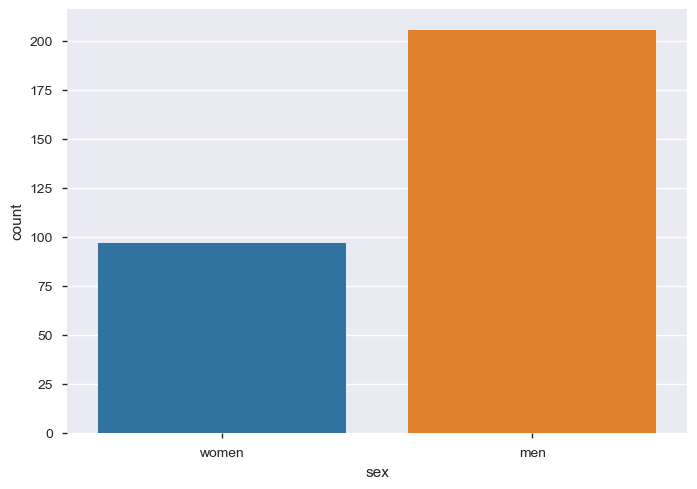

In [119]:
plot=sns.countplot(df.sex, dodge=False)
plot.set(xticklabels=["women","men"])


Jak widać wśród badanych pacjentów, zdecydowana większość to mężczyźni. Przyjrzyjmy się pacjentom, którzy zmienną "num" maja równą zero (czyli mają chorobę serca)


Procent badanych osobó u których wykryto chorobę serca
54.12541254125413
Procent badanych kobiet, u których wykryto chorobę serca
74.22680412371135
Procent mężczyzn, u których wykryto chorobę serca
44.66019417475729


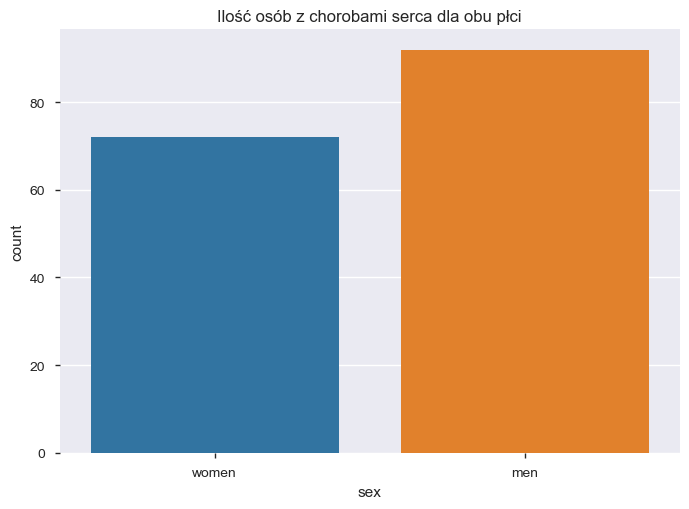

In [149]:
plot=sns.countplot(df[df.num==0].sex, dodge=False)
plot.set(xticklabels=["women","men"])
plot.set_title("Ilość osób z chorobami serca dla obu płci")

print("Procent badanych kobiet, u których wykryto chorobę serca")
print(len(df[(df.sex==0) & (df.num==0)])/len(df[df.sex==0])*100)
print("Procent mężczyzn, u których wykryto chorobę serca")
print(len(df[(df.sex==1) & (df.num==0)])/len(df[df.sex==1])*100)

Jak widać procent kobiet z chorobami serca jest wyższy niż procent mężczyzn z chorobami serca. W porównaniu z poprzednim rysunkiem różnica między słupkami wyraźnie zmalała.

## Rozkład poziomu cholesterolu

Text(0.5, 1.0, 'rozkład poziomu cholesterolu')

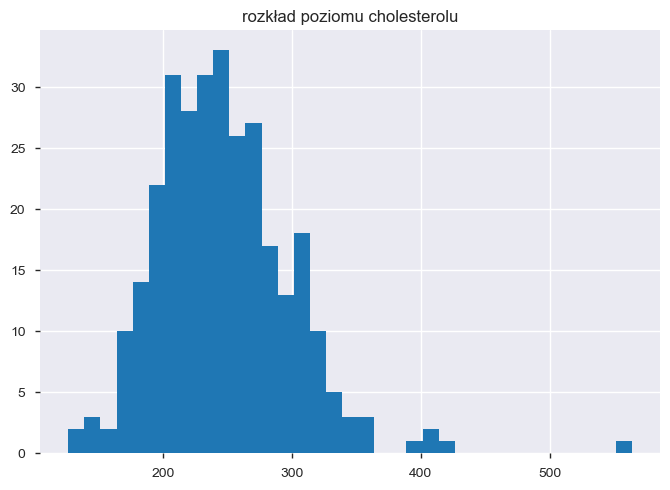

In [156]:
df['chol'].hist(bins=35)
plt.title('rozkład poziomu cholesterolu')

Z wyjątkiem outlierów widocznych na poziomie cholesterolu 400/500, rozkład przypomina rozkład normalny z wartością oczekiwaną około 250. Dobrze widać to na boxplocie:

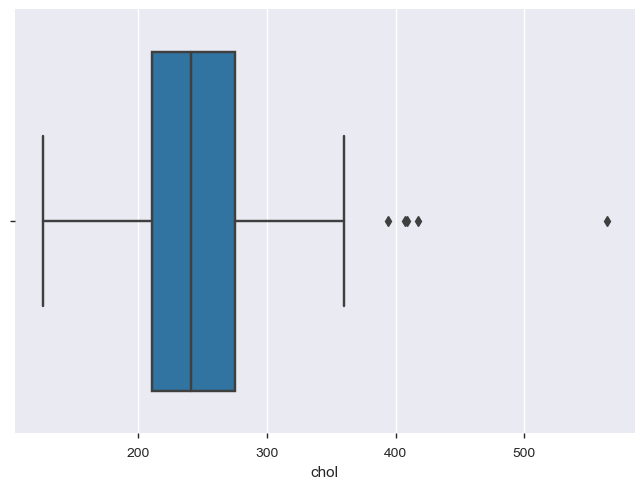

In [157]:
sns.boxplot(x=df['chol'])

## Rozkład zmiennej thalach czyli maksymalnego tętna

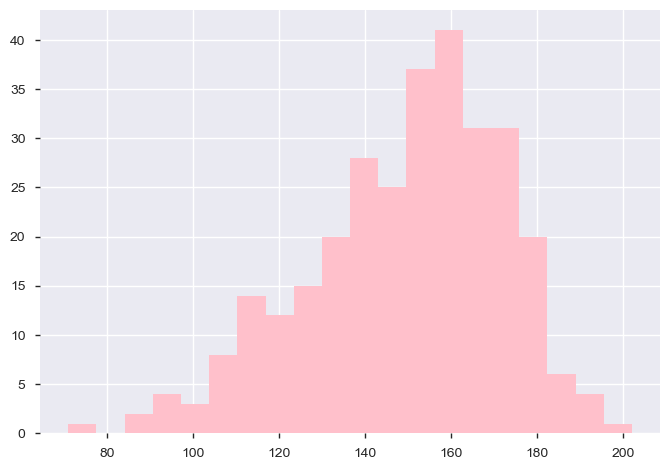

In [163]:
df['thalach'].hist(bins=20, color="pink")

# Zależności między zmiennymi


## Mapa obrazująca korelacje między zmiennymi

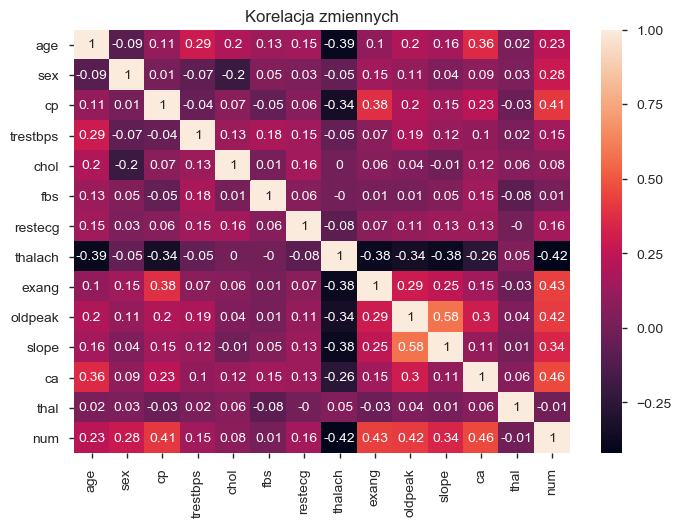

In [169]:
corr=df[df.ca!=-100000].corr().round(2)
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych')
plt.show()

Łatwo zauważyć, że wśród naszych danych nie ma mocnej korelacji między zmiennymi (wszystkie poniżej 0.6 i większe od -0.6). Warto jednak pamiętać że wiele z tych wartości ma rozkład dyskretny, który ciężej przełożyć na korelację. Dodatkowo w kolumnie "ca" występowały braki danych, dla których przypisano wartość -100000, co  bardzo zaburzało analizę korelacji, dlatego usunęłam te kilka rekordów. 

## Zależności pomiędzy niektórymi zmiennymi 


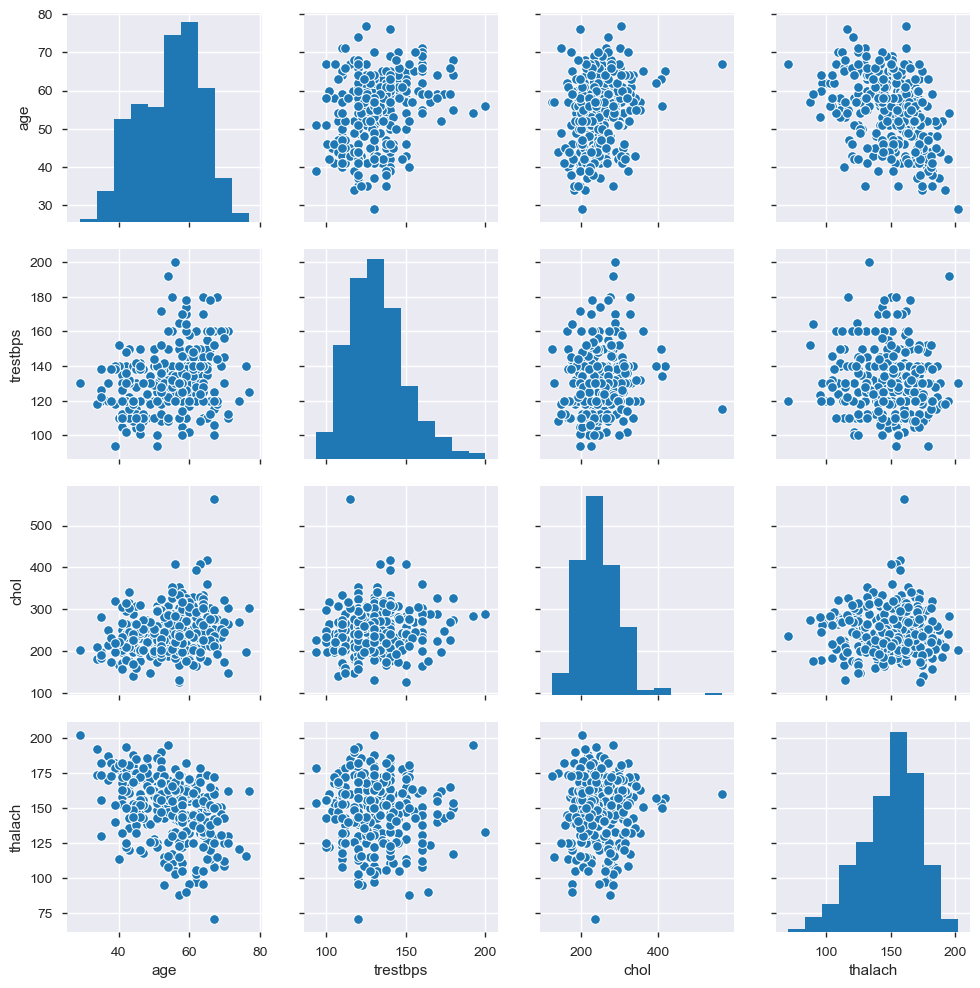

In [184]:
sns.pairplot(df.iloc[:, [0,3,4,7]])


## Cholesterol a płeć


[[Text(0, 0, 'kobiety'), Text(0, 0, 'mężczyźni')]]

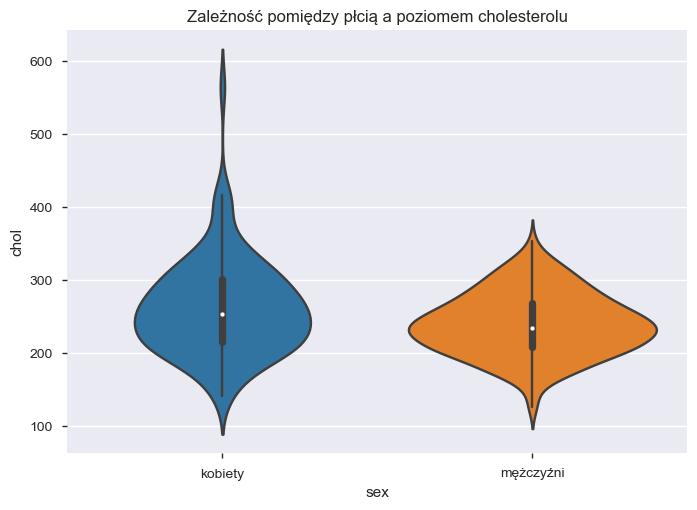

In [178]:
plot = sns.violinplot(df.sex, df.chol)
plot.set_title('Zależność pomiędzy płcią a poziomem cholesterolu')
plot.set(xticklabels=["kobiety","mężczyźni"])


Widać, że najwięcej osób ma poziom cholesterolu około 250. Osoby o najwyższym poziomie cholesterolu to kobiety. 

## Cholesterol a wiek 

Text(0.5, 0.98, 'Zależność poziomu cholesterolu od wieku, z podziałem na płci')

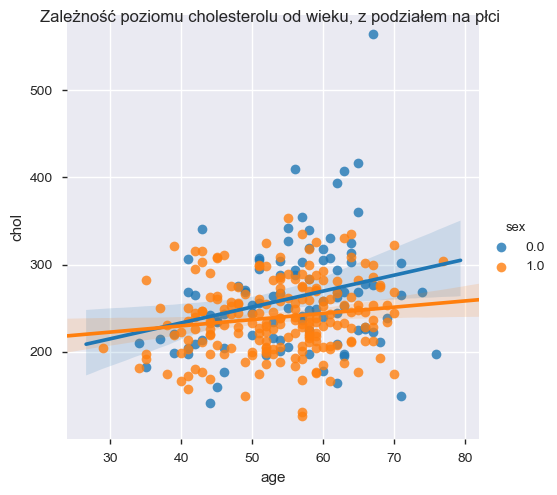

In [179]:
lm = sns.lmplot(x='age', y='chol', data=df, hue='sex')
fig = lm.fig 

fig.suptitle("Zależność poziomu cholesterolu od wieku, z podziałem na płci", fontsize=12)

u Kobiet (0) widać większą zależność między wiekiem a poziomem cholesterolu. U mężczyzn (1) linia trendu jest prawie pozioma. Warto pamiętać jednak, że kobiet biorących udział w badaniu było znacząco mniej.

## Zależność między tętnem a wiekiem

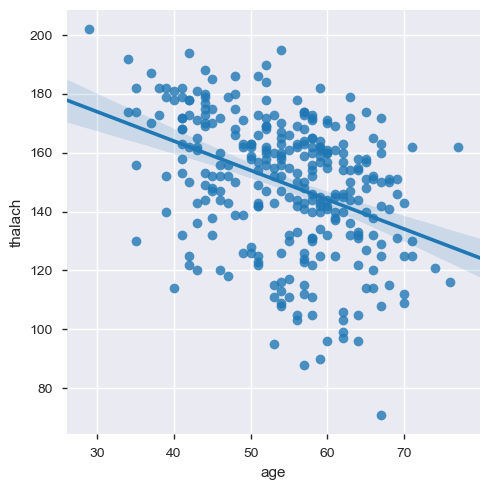

In [82]:
plot = sns.lmplot(x='age', y='thalach', data=df)

Thalach to maksymalne tętno osiągnięte przez pacjenta. Widać że im starsi pacjenci tym niższe maksymalne osiągnięte przez nich tętno. 

## Rodzaj bólu a poziom cholesterolu

1=typical angina; 2=atypical angine; 3=non-anginal pain; 4=asymptomatic

Text(0.5, 1.0, 'Zależność pomiędzy rodzajem bólu w klatce piersiowej a poziomem cholesterolu')

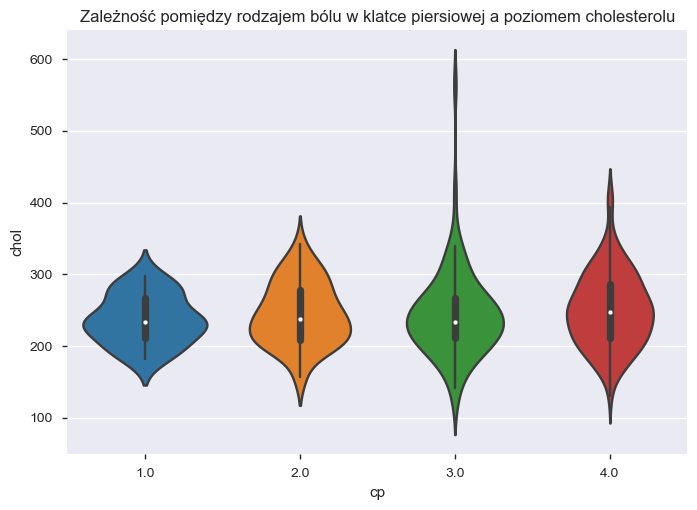

In [191]:
plot = sns.violinplot(df.cp, df.chol)
plot.set_title('Zależność pomiędzy rodzajem bólu w klatce piersiowej a poziomem cholesterolu')


Dosyć podobne wykresy cholesterolu dla wszystkich rodzajów bólu w klatce piersiowej. Osoby o najwyższym poziomie doświadczyły 3 rodzaju bólu. 

## Zależność między cholesterolem a maksymalnym tętnem osiągniętym przez pacjenta

### Scatter plot z linią trendu

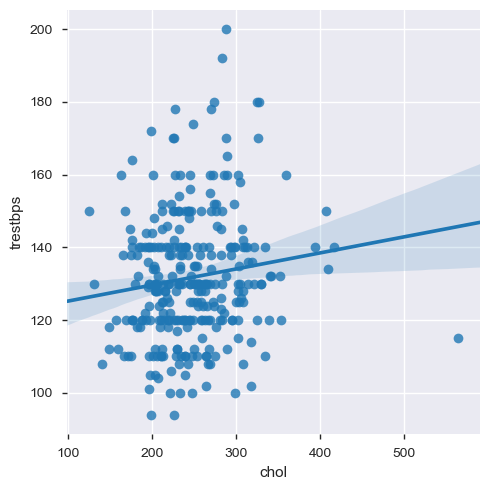

In [201]:
plot = sns.lmplot(x='chol', y='trestbps', data=df)


### Gęstość zmiennych

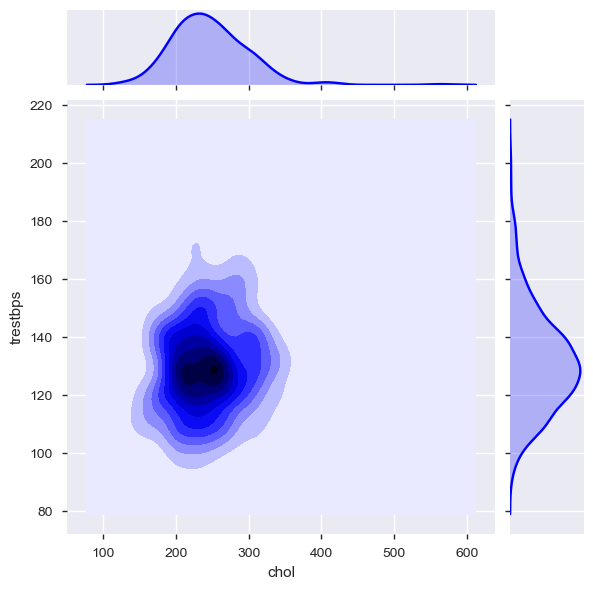

In [200]:
sns.jointplot(x=df["chol"], y=df["trestbps"], kind='kde', color = 'blue')


# Analiza z pandas_profiling

In [108]:
from pandas_profiling import ProfileReport

In [109]:
prof = ProfileReport(df)
prof

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.3 KiB
Average record size in memory,112.4 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


Automatyczny raport generowany za pomocą pakietu pandas_profiling z pewnością ma dużo zalet. Największą z nich jest oczywiście fakt, iż nie musimy sami generować wykresów i tabel - generują się one same. Może być to bardzo przydatne, gdy chcemy wstępnie przejrzeć dane, zobaczyć co w nich jest, przejrzeć gęstości i poszukać pierwszych zależności. Dosyć łatwo również stwierdzić które dane są ciągłe a które dyskretne. Późniejsza "ręczna" analiza jest jednak według mnie konieczna, ponieważ raport generowany automatycznie jest surowy, i znajduje się w nim bardzo dużo nieprzydatnych danych. Podsumowując, narzędzie to nie zastąpi "ręcznej" analizy ale może nam pomóc szybko wychwycić najważniejsze rzeczy.